## **Data Information**

Context
The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.


#### Boston housing dataset Atrributes Information (in Order):

Input features:
1) **CRIM :**   per capita crime rate by town
2) **ZN :**   proportion of residential land zoned for lots over 25,000 sq.ft.
3) **INDUS :**   proportion of non-retail business acres per town
4) **CHAS :**   Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5) **NOX :**   nitric oxides concentration (parts per 10 million) [parts/10M]
6) **RM :**   average number of rooms per dwelling
7) **AGE :**   proportion of owner-occupied units built prior to 1940
8) **DIS :**   weighted distances to five Boston employment centres
9) **RAD :**   index of accessibility to radial highways
10) **TAX :**   full-value property-tax rate per $10,000 [$/10k]
11) **PTRATIO :**   pupil-teacher ratio by town
12) **B :**   The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13) **LSTAT :**   % lower status of the population

Output variable:
1) **MEDV :**   Median value of owner-occupied homes in $1000's [k$]

## **Important Modules**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## **Import the Data**

In [2]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\boston (1).csv")
df.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#### Statistical Information

In [3]:
df.describe() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Datatype Information

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## **Data Preprocessing**

#### Checking Null values

In [5]:
df.isna().sum() 

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## **EDA**

#### CREATING BOX PLOTS

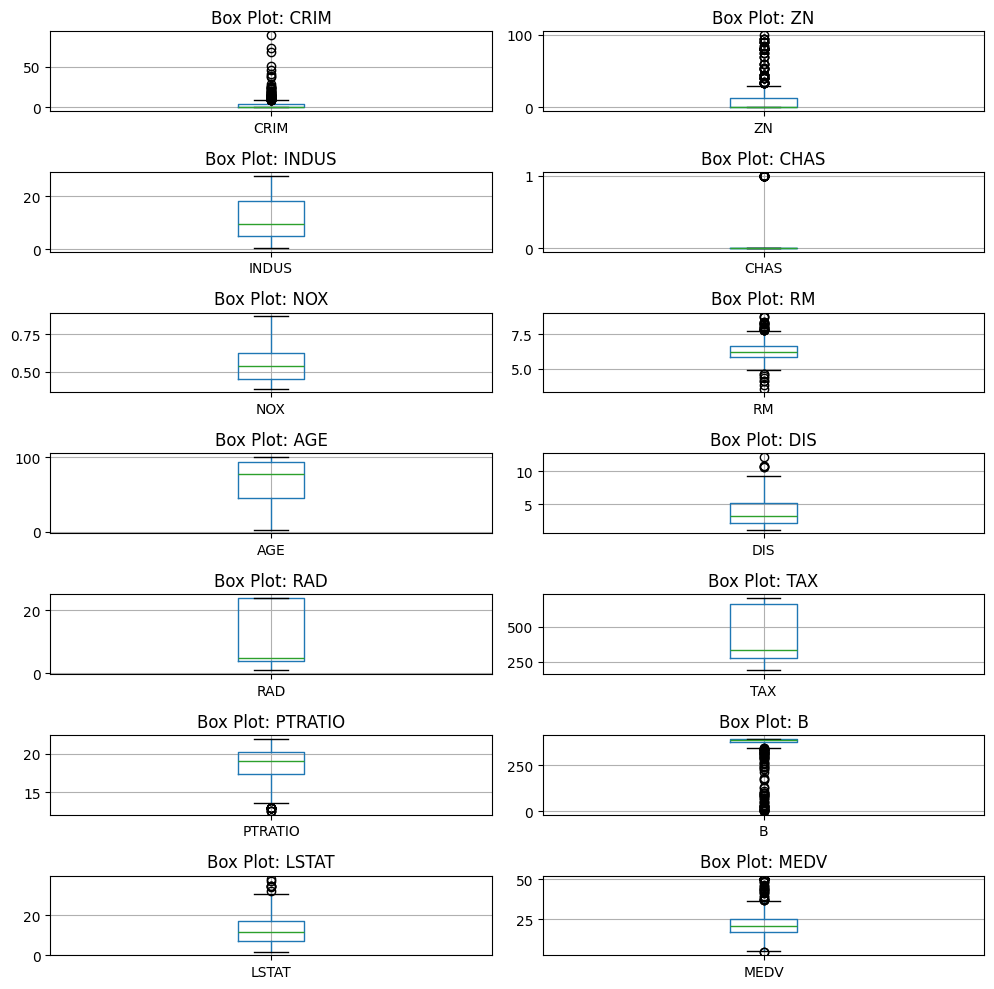

In [6]:
num_columns = len(df.columns)
num_rows = (num_columns + 1) // 2 

plt.figure(figsize=(10, 10))

for i, column in enumerate(df.columns):
    plt.subplot(num_rows, 2, i + 1) 
    df.boxplot(column, ax=plt.gca()) 
    plt.title(f"Box Plot: {column}")  

plt.tight_layout()
plt.show()  



#### CREATING DIST PLOTS

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7400\2482399052.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(value, ax=ax[index])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7400\2482399052.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(value, ax=ax[index])
C:\Users\Lenovo\AppData\Loca

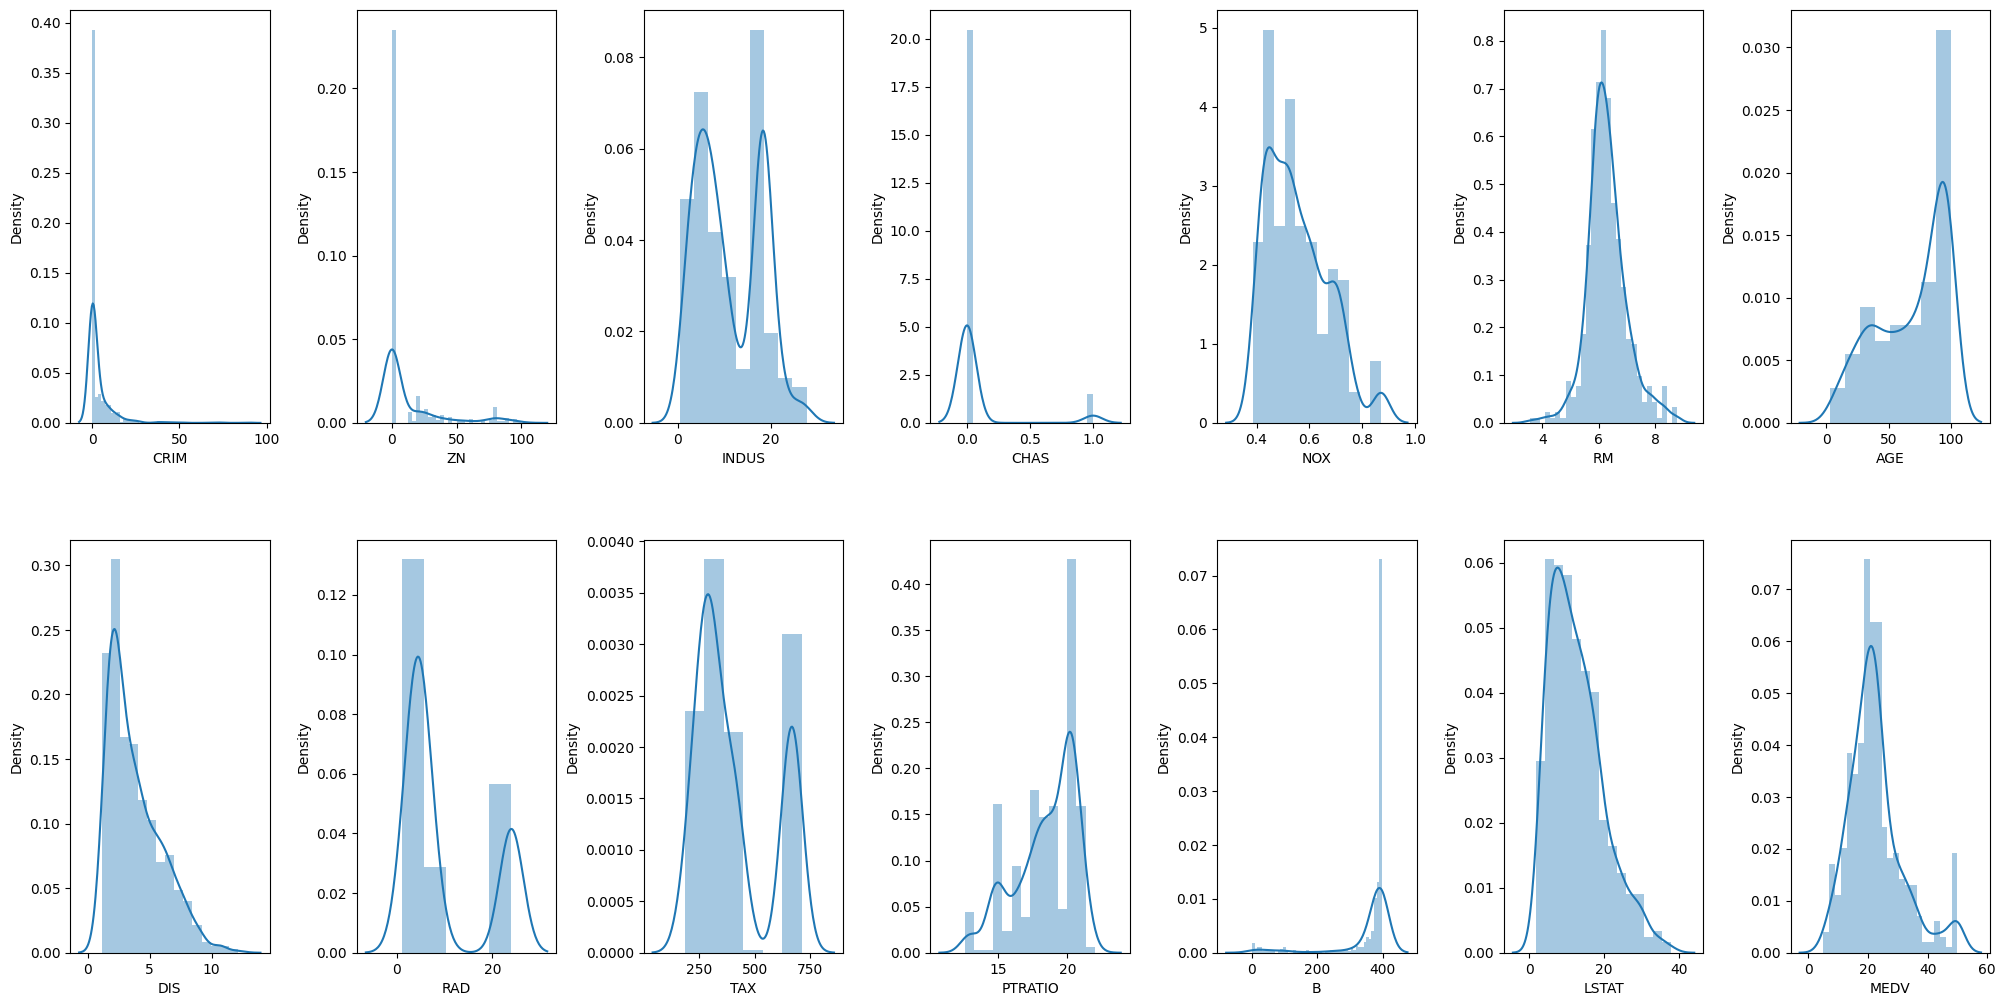

In [7]:
fig, ax = plt.subplots(2, 7, figsize=(20, 10))  # Increase the height by adjusting the second value (e.g., 14)
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

## **Min-Max Normalization**

In [8]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [9]:
cols = ['CRIM', 'ZN','TAX','B']

ms = MinMaxScaler()

df[cols] = ms.fit_transform(df[cols])
df[cols]

,CRIM,ZN,TAX,B
0,0.000000,0.18,0.208015,1.000000
1,0.000236,0.00,0.104962,1.000000
2,0.000236,0.00,0.104962,0.989737
3,0.000293,0.00,0.066794,0.994276
4,0.000705,0.00,0.066794,1.000000
...,...,...,...,...
501,0.000633,0.00,0.164122,0.987619
502,0.000438,0.00,0.164122,1.000000
503,0.000612,0.00,0.164122,1.000000
504,0.001161,0.00,0.164122,0.991301


In [10]:
df.describe() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,0.422208,18.455534,0.898568,12.653063,22.532806
std,0.096679,0.233225,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,0.321636,2.164946,0.230205,7.141062,9.197104
min,0.000000,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,0.000000,12.600000,0.000000,1.730000,5.000000
25%,0.000851,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,0.175573,17.400000,0.945730,6.950000,17.025000
50%,0.002812,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,0.272901,19.050000,0.986232,11.360000,21.200000
75%,0.041258,0.125000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,0.914122,20.200000,0.998298,16.955000,25.000000
max,1.000000,1.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,1.000000,22.000000,1.000000,37.970000,50.000000


## **Standardization**

In [11]:
scalar = StandardScaler()
scaled_cols = ['CRIM', 'ZN','TAX','B']

scaled_cols = scalar.fit_transform(df[scaled_cols]) 
scaled_cols = pd.DataFrame(scaled_cols, columns=cols)
scaled_cols.head()   

,CRIM,ZN,TAX,B
0,-0.419782,0.284830,-0.666608,0.441052
1,-0.417339,-0.487722,-0.987329,0.441052
2,-0.417342,-0.487722,-0.987329,0.396427
3,-0.416750,-0.487722,-1.106115,0.416163
4,-0.412482,-0.487722,-1.106115,0.441052


In [12]:
for col in cols:
    df[col] = scaled_cols[col] 
df.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,2.31,0,0.538,6.575,65.2,4.0900,1,-0.666608,15.3,0.441052,4.98,24.0
1,-0.417339,-0.487722,7.07,0,0.469,6.421,78.9,4.9671,2,-0.987329,17.8,0.441052,9.14,21.6
2,-0.417342,-0.487722,7.07,0,0.469,7.185,61.1,4.9671,2,-0.987329,17.8,0.396427,4.03,34.7
3,-0.416750,-0.487722,2.18,0,0.458,6.998,45.8,6.0622,3,-1.106115,18.7,0.416163,2.94,33.4
4,-0.412482,-0.487722,2.18,0,0.458,7.147,54.2,6.0622,3,-1.106115,18.7,0.441052,5.33,36.2


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7400\1167316083.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(value, ax=ax[index])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7400\1167316083.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(value, ax=ax[index])
C:\Users\Lenovo\AppData\Loca

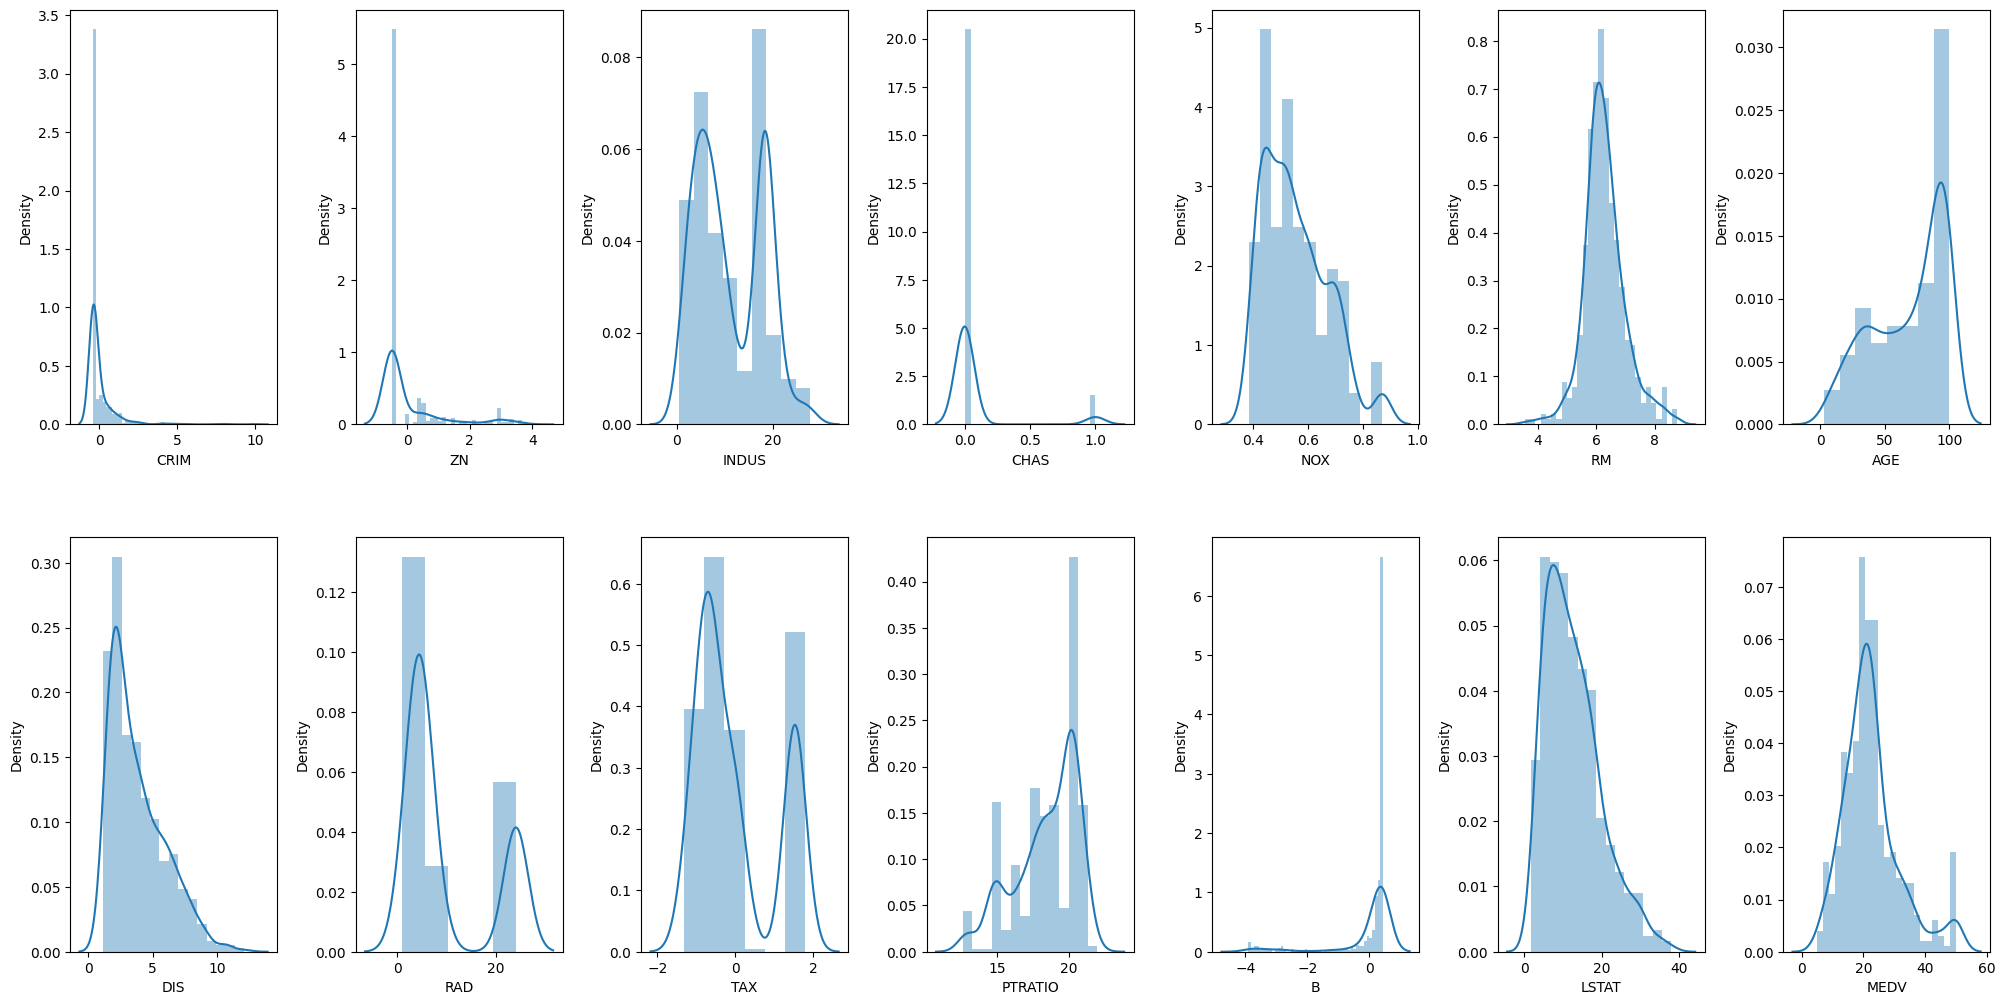

In [13]:
fig, ax = plt.subplots(2, 7, figsize=(20,10))  # Increase the height by adjusting the second value (e.g., 14)
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

## **Correlation Matrix**

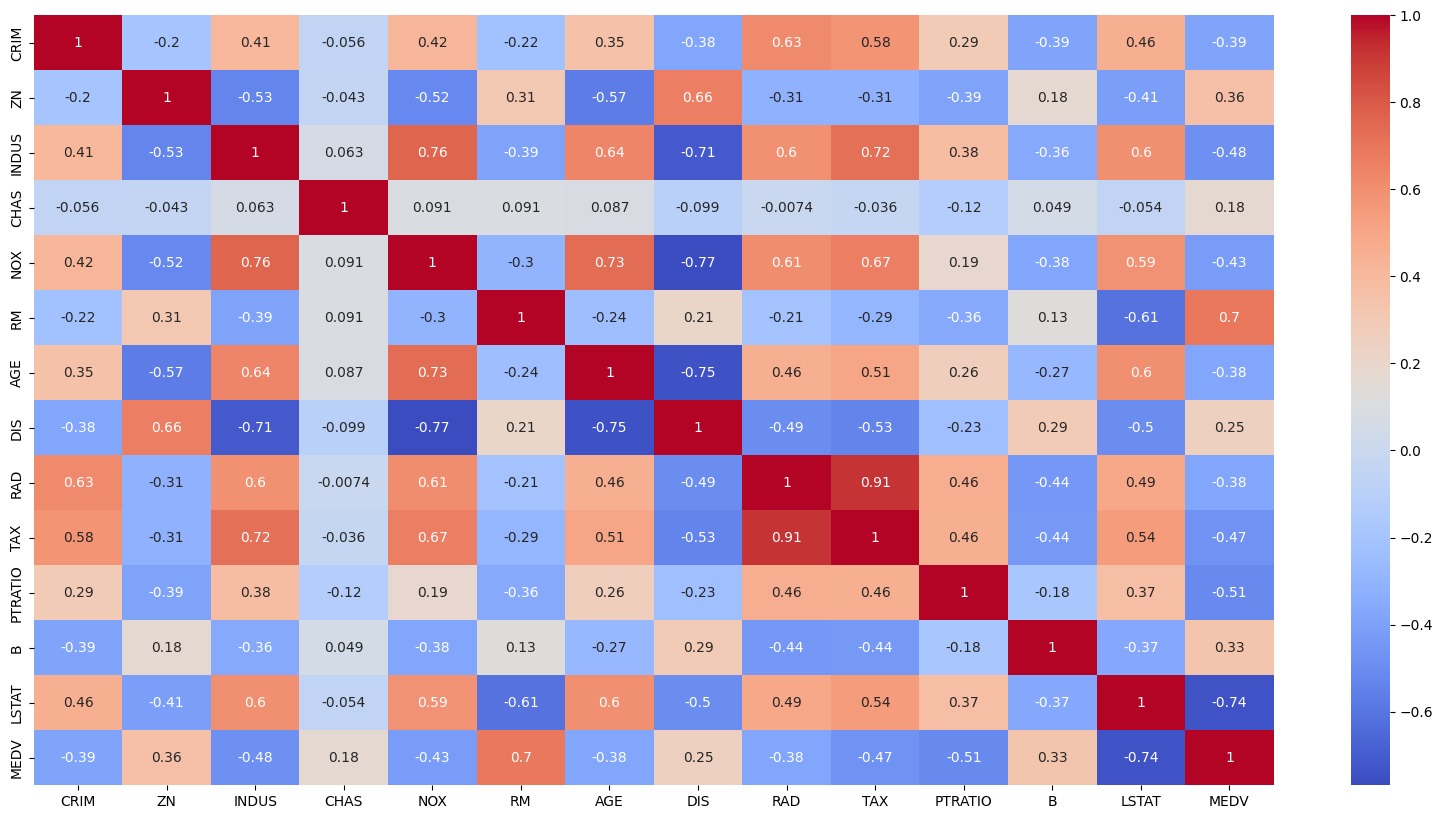

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show() 

<Axes: xlabel='LSTAT', ylabel='MEDV'>

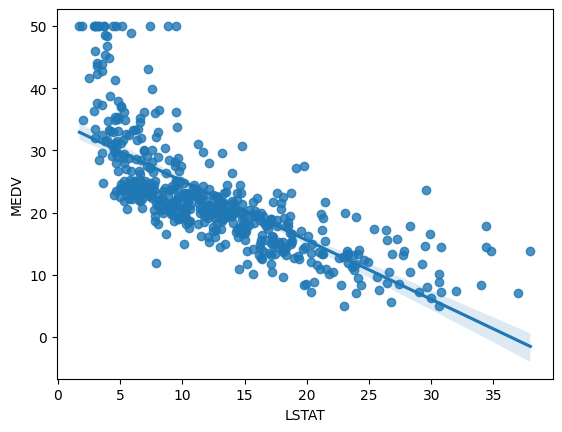

In [15]:
sns.regplot(y=df['MEDV'],x=df['LSTAT'])

<Axes: xlabel='RM', ylabel='MEDV'>

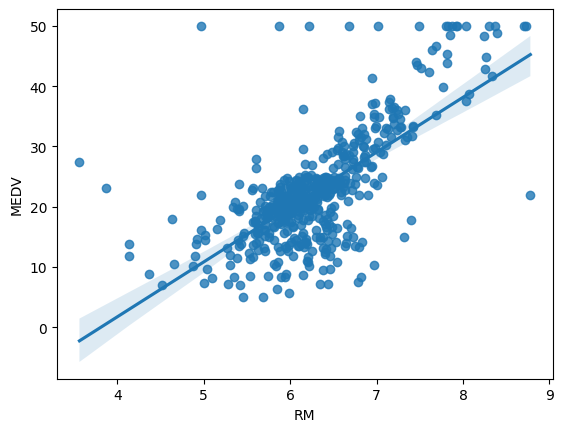

In [16]:
sns.regplot(y=df['MEDV'],x=df['RM'])

## **Input Split**

In [17]:
x= df.drop('MEDV', axis=1)
y = df['MEDV']

## **Train Test Split**

In [18]:
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state = 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape) 

(379, 13)
(127, 13)
(379,)
(127,)


## **Building Models**

#### 1) Linear Regression

In [19]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

#### 2) Decision Tree

In [20]:
model1 = DecisionTreeRegressor()
model1.fit(x_train,y_train)

DecisionTreeRegressor()

#### 3) Random Forest

In [21]:
model2 = RandomForestRegressor()
model2.fit(x_train,y_train)             

RandomForestRegressor()

## **Generating Predictions**

#### 1) Linear Regression

In [22]:
y_pred = model.predict(x_test) 

#### 2) Decision Tree

In [23]:
y_pred_dt = model1.predict(x_test) 

#### 3) Random Forest

In [24]:
y_pred_rf = model2.predict(x_test) 

## **Evaluating the Models**

#### 1) Linear Regression Model

In [25]:
cv_score = cross_val_score(model, x, y, scoring = 'neg_mean_squared_error' , cv = 5)
cv_score = np.abs(np.mean(cv_score)) 

print("Model Report")
print('CV_Score: ',cv_score)
print('MSE: ',mean_squared_error(y_pred,y_test))  

Model Report
CV_Score:  37.13180746769903
MSE:  22.09869482709797


<Axes: title={'center': 'Model Coefficients'}>

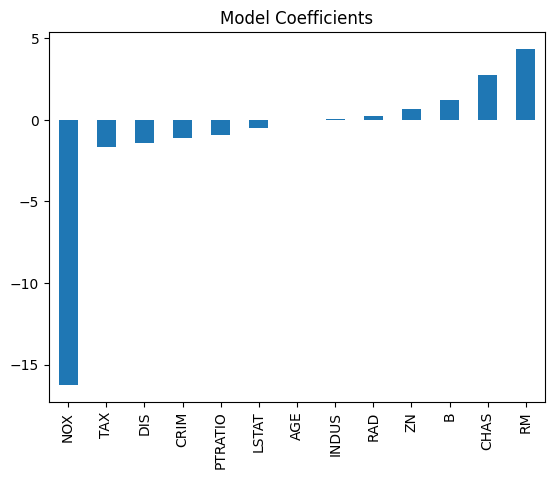

In [26]:
coef = pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind='bar',title='Model Coefficients') 

In [27]:
m = model.coef_
c = model.intercept_
print(m)
print(c) 

[-1.10268173e+00  6.88538503e-01  4.88590934e-02  2.77350326e+00
 -1.62388292e+01  4.36875476e+00 -9.24808158e-03 -1.40086668e+00
  2.57761243e-01 -1.67645630e+00 -9.23122944e-01  1.20257105e+00
 -5.17639519e-01]
30.34663958863774


#### 2) Decision Tree Model

Model Report
CV_Score:  41.010396427878085
MSE:  16.994251968503942


<Axes: title={'center': 'Feature Importance'}>

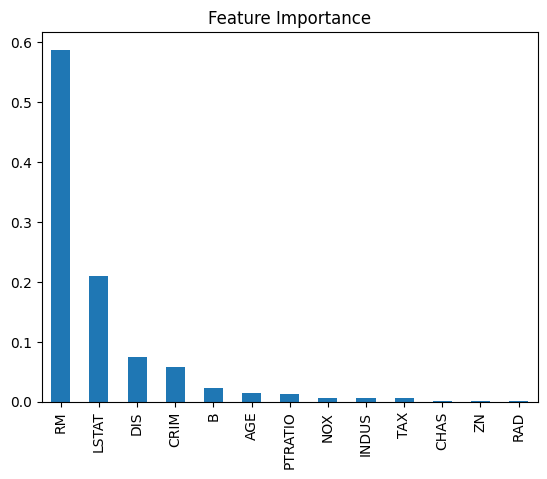

In [28]:
cv_score = cross_val_score(model1, x, y, scoring = 'neg_mean_squared_error' , cv = 5)
cv_score = np.abs(np.mean(cv_score)) 

print("Model Report")
print('CV_Score: ',cv_score)
print('MSE: ',mean_squared_error(y_pred_dt,y_test)) 
coef = pd.Series(model1.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='Feature Importance')

#### 3) Random Forest Model

Model Report
CV_Score:  20.6455582944865
MSE:  10.118570874015752


<Axes: title={'center': 'Feature Importance'}>

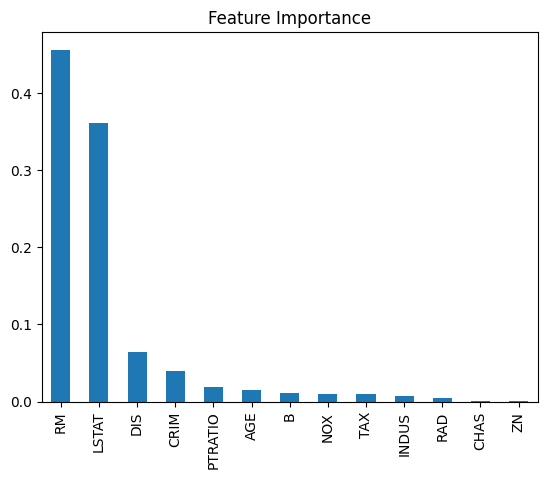

In [29]:
cv_score = cross_val_score(model2, x, y, scoring = 'neg_mean_squared_error' , cv = 5)
cv_score = np.abs(np.mean(cv_score)) 

print("Model Report")
print('CV_Score: ',cv_score)
print('MSE: ',mean_squared_error(y_pred_rf,y_test)) 
coef = pd.Series(model2.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='Feature Importance')

In [30]:
data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'MSE': [mean_squared_error(y_pred,y_test), mean_squared_error(y_pred_dt,y_test), mean_squared_error(y_pred_rf,y_test)],
    'CV Score': [np.abs(np.mean(cross_val_score(model, x, y, scoring = 'neg_mean_squared_error' , cv = 5))), np.abs(np.mean(cross_val_score(model1, x, y, scoring = 'neg_mean_squared_error',cv = 5))),
                 np.abs(np.mean(cross_val_score(model2, x, y, scoring = 'neg_mean_squared_error' , cv = 5)))]
}

result = pd.DataFrame(data)

result

,Model,MSE,CV Score
0,Logistic Regression,22.098695,37.131807
1,Decision Tree,16.994252,40.411478
2,Random Forest,10.118571,21.434162


#### **Random Forest Model is Performing best on this data.**

In [31]:
x_test.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,-0.409837,-0.487722,4.05,0,0.510,6.416,84.1,2.6463,5,-0.666608,16.6,0.425702,9.04
274,-0.413949,1.229060,6.41,1,0.447,6.758,32.9,4.0776,4,-0.916058,17.6,0.441052,3.53
491,-0.408212,-0.487722,27.74,0,0.609,5.983,98.8,1.8681,4,1.798194,20.1,0.366604,18.07
72,-0.409853,-0.487722,10.81,0,0.413,6.065,7.8,5.2873,4,-0.613155,19.2,0.375375,5.52
452,0.171842,-0.487722,18.10,0,0.713,6.297,91.8,2.3682,24,1.530926,20.2,0.311563,17.27


In [32]:
y_test[:5]

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: MEDV, dtype: float64

In [34]:
user_input = np.array([[0.10,0.5,1,0,0.150,4,100,5.00,2,1,17.6,0.754,1.0]])
predicted_survived = model2.predict(user_input)[0]

print(f"The price of the house is: ${predicted_survived:.2f}k")

The price of the house is: $27.47k


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
